# Week 9


# Sentiment Analysis

## What is sentiment analysis?
Sentiment analysis is a technique that detects the underlying sentiment in a piece of text.

It is the process of classifying text as either positive, negative, or neutral. Machine learning techniques are used to evaluate a piece of text and determine the sentiment behind it.

## Why is it useful?
Sentiment analysis is essential for businesses to gauge customer response.

Picture this: Your company has just released a new product that is being advertised on a number of different channels.

In order to gauge customer’s response to this product, sentiment analysis can be performed.

Customers usually talk about products on social media and customer feedback forums. This data can be collected and analyzed to gauge overall customer response.

Taking this a step further, trends in the data can also be examined. For example, customers of a certain age group and demographic may respond more favourably to a certain product than others.

Based on the information collected, companies can then position the product differently or change their target audience.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving amazon_reviews (1).csv to amazon_reviews (1).csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('amazon_reviews (1).csv')

In [4]:
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,353791,353792,B005A1LINC,A141W8WHW9AC3H,"Nelly ""Vision Teacher""",0,0,4,1321315200,"Good, but I like Appletini flavor better","I would personally probably give this 3 stars,..."
1,400035,400036,B002IEVJRY,A30J70Y1ORW6TA,dephal,0,0,3,1332547200,Good but not great,This drink is tasty. Not too sweet. But it doe...
2,91754,91755,B003OPCMZO,A28X234QNUSQPW,"musicfan ""NK""",0,4,5,1317254400,Used this for saffron bread.,[...]<br /><br />This goes a very long ways. ...
3,405951,405952,B0000ICLKY,A2OKSD3SLPEM1V,CougGirl,3,3,5,1134000000,so yummy!,these taste like the inside of a peanut butter...
4,91029,91030,B004PCWXHM,A1IOGEZUZPII8C,travels10,0,0,5,1340064000,EXCELLENT cheese,Tavern Cheddar from Deli Direct is another one...


The data that we will be using most for this analysis is “Summary”, “Text”, and “Score.”

Text — This variable contains the complete product review information.

Summary — This is a summary of the entire review.

Score — The product rating provided by the customer.

Look at the variable “Score” to see if majority of the customer ratings are positive or negative.

In [5]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
# py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

From here, we can see that most of the customer rating is positive. This leads me to believe that most reviews will be pretty positive too, which will be analyzed in a while.

Now, we can create some wordclouds to see the most frequently used words in the reviews.

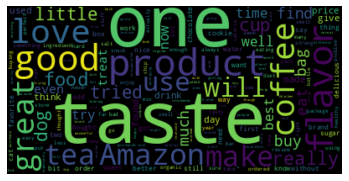

In [6]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS) #Built in stopwords
stopwords.update(["br", "href"]) # Common HTML tags
textt = " ".join(review for review in df.Text) #contains all of the text data in the df.Text column. The join method is used to concatenate the individual strings in df.Text with a space separator between them. 
#This is necessary because the WordCloud class expects input data to be in string format.
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear') #smooth image
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

Some popular words that can be observed here include “taste,” “product,” “love,” and “Amazon.” These words are mostly positive, also indicating that most reviews in the dataset express a positive sentiment.

Here we use a proxy to determine the sentiment. If the Score > 3, then it is a positive sentiment. Else, the sentiment is negative. Reviews with ‘Score’ = 3 will be dropped, because they are neutral.

The apply method is used here to apply a lambda function to each value in the 'Score' column. The lambda function takes a single argument rating, which represents a single value in the 'Score' column. The function returns +1 if the rating is greater than 3 (indicating a positive sentiment), and -1 otherwise (indicating a negative sentiment).

The resulting output of the lambda function is assigned to a new column in the DataFrame called 'sentiment'. This  effectively converts the numeric ratings in the 'Score' column to a binary sentiment label (positive or negative) and stores them in a new column for further analysis.

In [7]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Score'] != 3] #removes all rows from the DataFrame where the 'Score' column has a value of 3.
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1) # See comments above

<ipython-input-7-1d066d67b1fd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head(7)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,353791,353792,B005A1LINC,A141W8WHW9AC3H,"Nelly ""Vision Teacher""",0,0,4,1321315200,"Good, but I like Appletini flavor better","I would personally probably give this 3 stars,...",1
2,91754,91755,B003OPCMZO,A28X234QNUSQPW,"musicfan ""NK""",0,4,5,1317254400,Used this for saffron bread.,[...]<br /><br />This goes a very long ways. ...,1
3,405951,405952,B0000ICLKY,A2OKSD3SLPEM1V,CougGirl,3,3,5,1134000000,so yummy!,these taste like the inside of a peanut butter...,1
4,91029,91030,B004PCWXHM,A1IOGEZUZPII8C,travels10,0,0,5,1340064000,EXCELLENT cheese,Tavern Cheddar from Deli Direct is another one...,1
5,61221,61222,B002OI9U9I,A1F6PDXFPGUSYO,D. Ury,0,0,5,1325635200,I'm totally addicted!!!,I chose this particular truffle salt VS others...,1
6,79635,79636,B004TJD758,A2TRMJA5NJS5TW,cserhus,16,16,5,1319673600,Great product,At first I didn't care for this because I trie...,1
7,47929,47930,B004SRH2B6,A3D31W9T3EAYO6,Eso,0,0,1,1337644800,Pineapple?,"Didn't taste anything like Pineapple to me, yo...",-1


creates a new DataFrame called positive that contains only the rows from the original DataFrame where the 'sentiment' column has a value of 1 (indicating a positive sentiment).

Same logic for negative.

In [ ]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

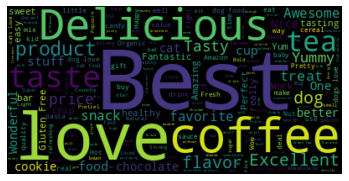

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

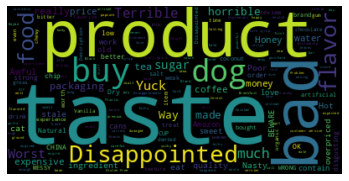

In [ ]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud33.png')
plt.show()

As seen above, the positive sentiment word cloud was full of positive words, such as “love,” “best,” and “delicious.”

The negative sentiment word cloud was filled with mostly negative words, such as “disappointed,” and “yuck.”

The words “good” and “great” initially appeared in the negative sentiment word cloud, despite being positive words. This is probably because they were used in a negative context, such as “not good.”

The replace method is used here to replace all occurrences of -1 & 1 in the 'sentiment' column with the string 'negative' and 'positive' resp. The method takes a dictionary as an argument, where the keys represent the values to be replaced and the values represent the replacement values.

The resulting output of the replace method is assigned to a new column in the DataFrame called 'sentimentt'. 

In [ ]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

# TF-IDF



## Introduction
Natural Language Processing has many applications these days. An important application of Natural Language Processing is text classification and text analytics. For this purpose, we need to create a classifier. But, the problem that lies in dealing with text data is that computers cannot directly understand natural language. Computers cannot simply take text input and understand the context of the text.

So, we use text vectorization for these cases. Term Frequency Inverse Document Frequency (TF-IDF) analysis is one of the simple and robust methods to understand the context of a text. Term Frequency and Inverse Document Frequency is used to find the related content and important words and phrases in a larger text. Implementing TF-IDF analysis is very easy using Python. Computers cannot understand the meaning of a text, but they can understand numbers. The words can be converted to numbers so that the relationship between them can be understood.



## Term Frequency (TF)
The term is frequency measure of a word w in a document (text) d. It is equal to the number of instances of word w in document d divided by the total number of words in document d. Term frequency serves as a metric to determine a word’s occurrence in a document as compared to the total number of words in a document. The denominator is always the same.

$\text{tf} = \frac{\text{number of instances of word w in document d}}{\text{total number of words in document d}}$

## Inverse Document Frequency (IDF)
This parameter gives a numeric value of the importance of a word. Inverse Document frequency of word w is defined as the total number of documents (N) in a text corpus D, divided by the number of documents containing w.

$IDF = log(\frac{\text{total number of documents (N) in corpus D}}{\text{number of documents containing w}})$

## TF-IDF
The product of TF and IDF is the TF-IDF. TF-IDF is usually one of the best metrics to determine if a term is significant to a text. It represents the importance of a word in a particular document.

The issue with such methods is that they cannot understand synonyms, semantics, and other emotional aspects of language. For example, large and big are synonymous, but such methods cannot identify that.



Numerical Example
Imagine the term t appears 20 times in a document that contains a total of 100 words. The Term Frequency (TF) of t can be calculated as follow:

TF=20/100=0.2

Assume a collection of related documents containing 10,000 documents. If 100 documents out of 10,000 documents contain the term t, the Inverse Document Frequency (IDF) of t can be calculated as follows

IDF=log(10000/100)=2

Using these two quantities, we can calculate the TF-IDF score of the term t for the document.

TF-IDF=0.2×2=0.4

In [9]:
text=["kolkata big city india trade","mumbai financial capital india","delhi capital india","kolkata capital colonial times",
     "bangalore tech hub india software","mumbai hub trade commerce stock exchange","kolkata victoria memorial","delhi india gate",
      "mumbai gate way india trade business","delhi red fort india","kolkata metro oldest india",
      "delhi metro largest metro network india"]

In [10]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
count = CountVectorizer() # Creates an instance
word_count=count.fit_transform(text) #fit_transform fits the vectorizer to the input data and transforms the input data into a matrix of token counts. 
#The resulting word_count variable is a sparse matrix where each row corresponds to a document in the corpus and each column corresponds to a unique token (i.e., word). 
#The value in each cell represents the number of times that word appears in the corresponding document.
print(word_count)

  (0, 14)	1
  (0, 1)	1
  (0, 4)	1
  (0, 13)	1
  (0, 26)	1
  (1, 13)	1
  (1, 18)	1
  (1, 9)	1
  (1, 3)	1
  (2, 13)	1
  (2, 3)	1
  (2, 7)	1
  (3, 14)	1
  (3, 3)	1
  (3, 5)	1
  (3, 25)	1
  (4, 13)	1
  (4, 0)	1
  (4, 24)	1
  (4, 12)	1
  (4, 22)	1
  (5, 26)	1
  (5, 18)	1
  (5, 12)	1
  (5, 6)	1
  :	:
  (6, 14)	1
  (6, 27)	1
  (6, 16)	1
  (7, 13)	1
  (7, 7)	1
  (7, 11)	1
  (8, 13)	1
  (8, 26)	1
  (8, 18)	1
  (8, 11)	1
  (8, 28)	1
  (8, 2)	1
  (9, 13)	1
  (9, 7)	1
  (9, 21)	1
  (9, 10)	1
  (10, 14)	1
  (10, 13)	1
  (10, 17)	1
  (10, 20)	1
  (11, 13)	1
  (11, 7)	1
  (11, 17)	2
  (11, 15)	1
  (11, 19)	1


In [12]:
word_count.shape

(12, 29)

In [13]:
print(word_count.toarray())

[[0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0]]


In [14]:
count.get_feature_names_out()

array(['bangalore', 'big', 'business', 'capital', 'city', 'colonial',
       'commerce', 'delhi', 'exchange', 'financial', 'fort', 'gate',
       'hub', 'india', 'kolkata', 'largest', 'memorial', 'metro',
       'mumbai', 'network', 'oldest', 'red', 'software', 'stock', 'tech',
       'times', 'trade', 'victoria', 'way'], dtype=object)

In [15]:
pd.DataFrame(word_count.toarray(), columns=count.get_feature_names_out())

,bangalore,big,business,capital,city,colonial,commerce,delhi,exchange,financial,...,network,oldest,red,software,stock,tech,times,trade,victoria,way
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
# We had taken 12 sentences, and there are 29 unique words, so the shape is 12/29.

creates an instance of the TfidfTransformer class from the scikit-learn library with two parameters:

smooth_idf=True: This parameter ensures that the IDF weights are smoothed to avoid division by zero errors. It adds a constant value of 1 to the document frequency of each term.
use_idf=True: This parameter ensures that the transformer applies IDF weighting to the term frequency counts.

Fits the transformer to the input data word_count, which is a matrix that represents the frequency of each word in the corpus. The fit method computes the IDF weights for each term in the corpus, which are used to transform the term frequency counts to TF-IDF scores.

In [17]:
#See comments above
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)

TfidfTransformer()

In [ ]:
#creates a Pandas DataFrame df_idf from the IDF (inverse document frequency) values computed by tfidf_transformer.
# The idf_ attribute of tfidf_transformer is a NumPy array containing the IDF score for each term in the corpus.
# The index parameter is set to count.get_feature_names_out() to use the terms as the index of the DataFrame,
# and the columns parameter is set to "idf_weights" to label the column containing the IDF weights.
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names_out(),columns=["idf_weights"])
#inverse document frequency
# sorts the DataFrame df_idf by the IDF weights in ascending order.
#This allows us to see which terms are least important in the corpus based on their IDF weights.
df_idf.sort_values(by=['idf_weights'])

,idf_weights
india,1.262364
kolkata,1.955511
delhi,1.955511
trade,2.178655
capital,2.178655
mumbai,2.178655
gate,2.466337
hub,2.466337
metro,2.466337
times,2.871802


In [18]:
#tfidf
#TfidfTransformer, which is a class in the scikit-learn library that computes the TF-IDF score for each term in the document.
#word_count is a matrix that represents the frequency of each word in the document.
tf_idf_vector=tfidf_transformer.transform(word_count)  
feature_names = count.get_feature_names_out()
#extracts the TF-IDF vector of the first document in the corpus, which is represented as a sparse matrix.
first_document_vector=tf_idf_vector[1]
#Creates a Pandas DataFrame called df_tfifd from the TF-IDF vector of the first document. 
#The T method is used to transpose the vector, and the todense method is used to convert the sparse matrix to a dense matrix.
#The resulting dense matrix is used to create the DataFrame.
# The index parameter is set to feature_names to use the terms as the index of the DataFrame,
# and the columns parameter is set to "tfidf" to label the column containing the TF-IDF scores.
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
#sorts the DataFrame df_tfifd by the TF-IDF score in descending order.
#This allows us to see which terms are most important in the first document based on their TF-IDF scores.
df_tfifd.sort_values(by=["tfidf"],ascending=False)

,tfidf
financial,0.653123
capital,0.495483
mumbai,0.495483
india,0.287095
bangalore,0.000000
memorial,0.000000
victoria,0.000000
trade,0.000000
times,0.000000
tech,0.000000


https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
